## Project

#### This project is divided into four parts:
##### _ Web scraping amazon to collect data about laptops
##### _ Web scraping each laptop page to get details(processor, RAM,...)
##### _ Web scaping [camelcamelcamel](https://camelcamelcamel.com/) to collect laptop prices
##### _ Analysis

### Web scraping Amazon

The first step is to go to Amazon and search in the search bar for a laptop. <br>
From here, scraping the laptop's name, price, and link from all result pages.

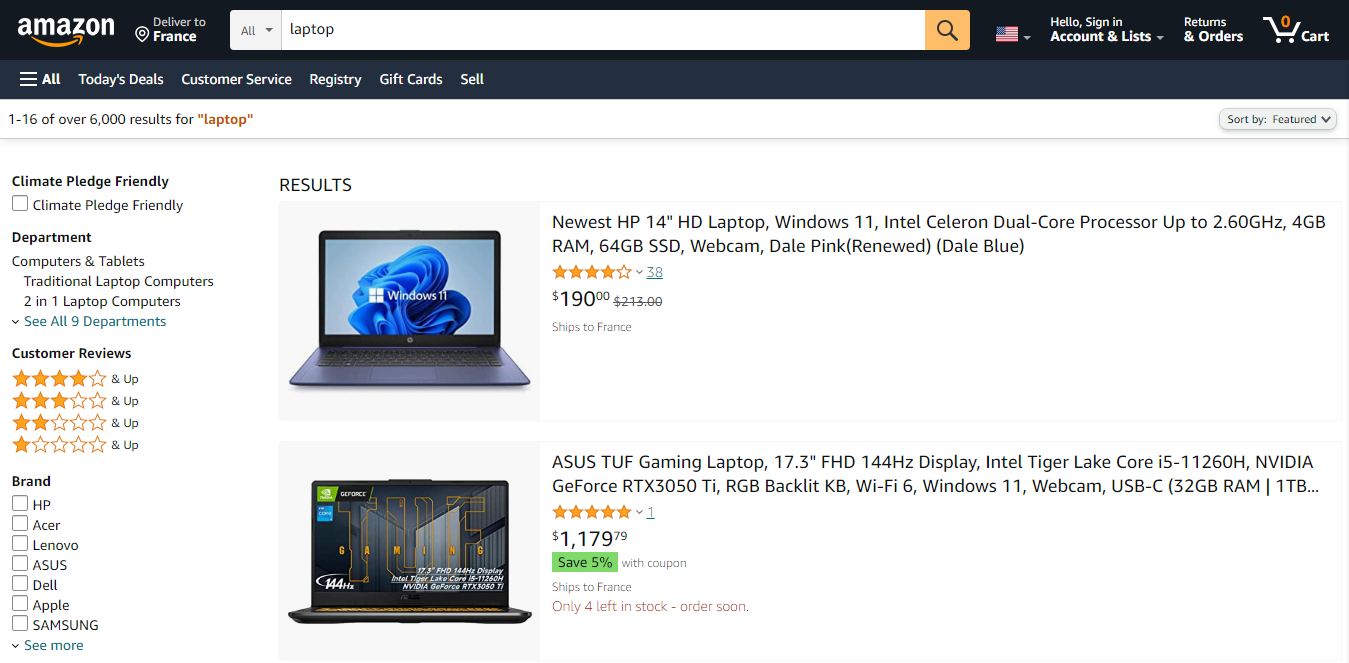

Python code:

In [ ]:
# Libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd

# Parsing amazon page and retrieving HTML

url = 'https://www.amazon.com/s?k=laptop'

# Preventing amazon to detect parser

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.80 Safari/537.36 Edg/98.0.1108.43",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9"
}

# Get data


def get_soup(url):
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup


list = []
links = []

# Just scraping titles, prices and links from the soup


def get_laptops(soup):
    laptops = soup.find_all(
        'div', class_='s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 sg-col s-widget-spacing-small sg-col-12-of-16')

    for laptop in laptops:
        title = laptop.find(
            'span', class_='a-size-medium a-color-base a-text-normal').text

        # For a lot of cases Amazon don't display product price

        try:
            price = laptop.find(
                'span', class_='a-price-whole').text[:-1]
        except:
            price = 'None'

        link = "https://www.amazon.com/" + \
            str(laptop.find("a", {
                "class": "a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"}).attrs['href'])

        item = {
            'Title': title,
            'Price': price,
            'Link': link
        }
        list.append(item)

        links.append(link)

# Scraping all the pages


for x in range(20):
    soup = get_soup(f'https://www.amazon.com/s?k=laptop&page={x}')
    print(f'Getting page: {x}')
    get_laptops(soup)
    if not soup.find('span', {'class': 's-pagination-item s-pagination-next s-pagination-disabled'}):
        pass
    else:
        break

# Creating a csv file

df = pd.DataFrame(list)
df.to_csv('laptops.csv')


#### Result:

In [14]:
import pandas as pd

df = pd.read_csv('laptops.csv')
df.head(10)

,Link,Title,Price
0,https://www.amazon.com//2021-Dell-Inspiron-Lap...,"2021 Dell Inspiron 15 Laptop: Core i5-1035G1, ...",$555.00
1,https://www.amazon.com//2021-MSI-HD-Gaming-i5-...,"2021 MSI - GF63035 | 15.6"" Full HD Gaming Lapt...",None
2,https://www.amazon.com//2022-ASUS-Vivobook-15-...,"2022 ASUS Vivobook 15.6"" FHD Laptop - Intel 10...","$1,099.00"
3,https://www.amazon.com//2022-HP-Performance-Bu...,2022 HP High Performance Business Laptop - 15....,None
4,https://www.amazon.com//2022-LENOVO-ThinkPad-Y...,2022 LENOVO ThinkPad X1 Yoga Gen 5 2-in-1 Lapt...,None
5,https://www.amazon.com//Acer-3-60GHz-i5-1035G-...,"Acer Aspire 3 Laptop, 17.3'' HD+ 1600 x 900, 3...",$479.00
6,https://www.amazon.com//Acer-A515-46-R3UB-Disp...,"Acer Aspire 5 A515-46-R3UB | 15.6"" Full HD IPS...",None
7,https://www.amazon.com//Acer-A515-55-35SE-i3-1...,"Acer Aspire 5 A515-55-35SE, 15.6"" Full HD Disp...",$369.00
8,https://www.amazon.com//Acer-A515-56-53S3-i5-1...,"Acer Aspire 5 A515-56-53S3 Laptop | 15.6"" Full...",$602.62
9,https://www.amazon.com//Acer-A515-56-702V-i7-1...,"Acer Aspire 5 A515-56-702V Laptop | 15.6"" Full...",None


### Web scraping each laptop page


Here it's time to know more about laptops like processor, RAM and others

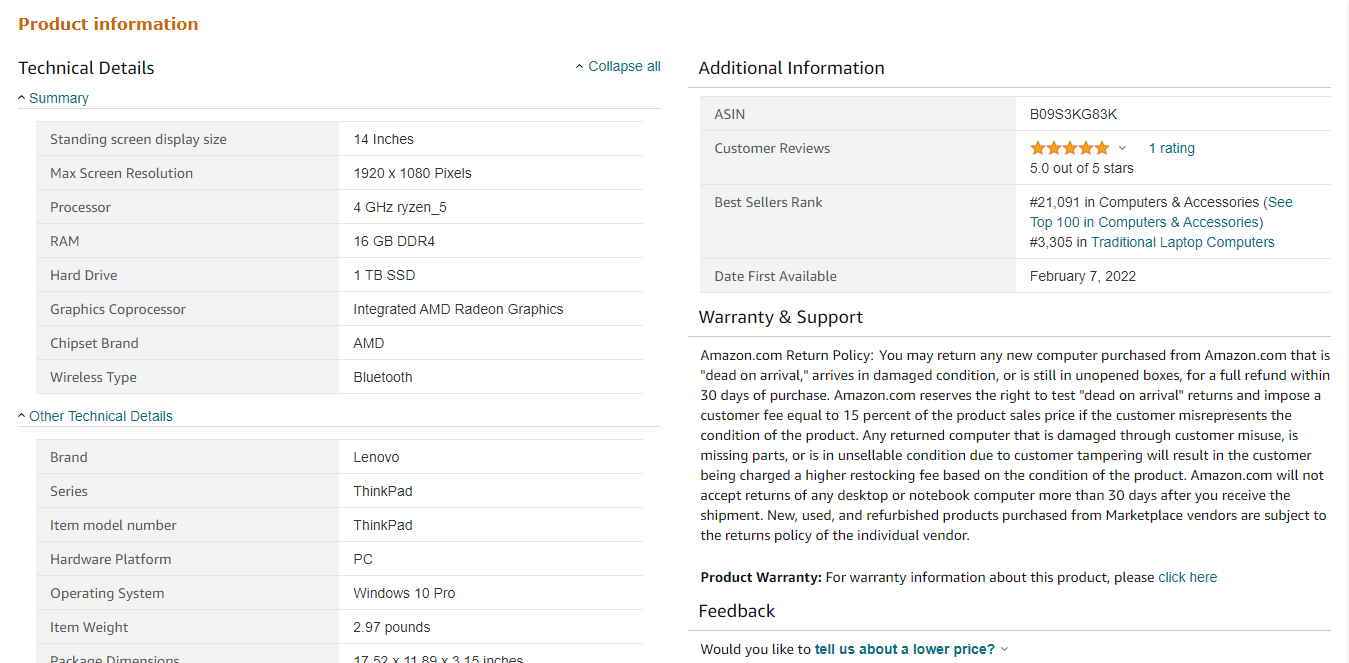

Python code:

In [ ]:
# Libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

# Creating a list of every laptop URL on Amazon

filename = 'laptops.csv'
data = pd.read_csv(filename)
links = data['link'].tolist()

# Preventing amazon to detect parser

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 7.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.80 Safari/537.36 Edg/98.0.1108.43",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://google.com/"
}

# Creating a dataframe for the csv file

head = ['Link', 'Standing screen display size', 'Screen Resolution', 'Max Screen Resolution', 'Processor', 'RAM',	'Memory Speed',	'Hard Drive', 'Graphics Coprocessor',
        'Chipset Brand', 'Card Description', 'Wireless Type', 'Graphics Card Ram Size', 'Number of USB 2.0 Ports',	'Number of USB 3.0 Ports', 'Average Battery Life (in hours)']

df = pd.DataFrame(columns=head)

# Get data function


def get_details(url):

    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')

    table1 = soup.find('table', {'id': 'productDetails_techSpec_section_1'})

    # Collecting Ddata
    for row in table1.find_all('tr'):
        # Find all data for each column
        column = row.find_all('td')
        for columns in column:
            att = columns.text.strip()
            attr = att[1:]
            attribute.append(attr)
        syntax = row.find_all('th')
        for i in syntax:
            title = i.text.strip()
            header.append(title)

# Getting data from every laptop page


error = []
for link in links:
    header = []
    header.append('Link')
    attribute = []
    attribute.append(link)
    url = link

    try:
        get_details(url)
        res = dict(zip(header, attribute))
        df.loc[len(df)] = res
    except:
        error.append(url)
    time.sleep(random.uniform(5, 15))

# Creating a csv file

errors = pd.DataFrame(error)
errors.to_csv('error_links.csv')
df.to_csv('details.csv')


##### Result:

In [15]:
df = pd.read_csv('details.csv')
df.head(10)

,Link,Standing screen display size,Screen Resolution,Max Screen Resolution,Processor,RAM,Memory Speed,Hard Drive,Graphics Coprocessor,Chipset Brand,Card Description,Wireless Type,Graphics Card Ram Size,Number of USB 2.0 Ports,Number of USB 3.0 Ports,Average Battery Life (in hours)
0,https://www.amazon.com//Acer-A515-46-R3UB-Disp...,15.6 Inches,NaN,1920 x 1080,3.5 GHz ryzen_3,4 GB DDR4,3.5 GHz,128 GB SSD,NaN,AMD,Integrated,Bluetooth,NaN,1.0,3.0,10 Hours
1,https://www.amazon.com//Lenovo-IdeaPad-Display...,15.6,NaN,1920 x 1080,3.3 ryzen_5,8 GB DDR4,3200 MHz,256 GB SSD,NVIDIA GeForce GTX 1650,NVIDIA,Dedicated,802.11ax,NaN,NaN,2.0,8 Hours
2,https://www.amazon.com//HP-Notebook-Display-3-...,14 Inches,NaN,1920 x 1080 Pixels,2.6 GHz ryzen_3_3250u,16 GB DDR4,3.5 GHz,512 GB SSD,AMD Radeon Graphics,AMD,NaN,"Bluetooth, 802.11a",NaN,NaN,NaN,NaN
3,https://www.amazon.com//ASUS-i9-11900H-ScreenP...,15.6 Inches,3840 x 2160 pixels,3840 x 2160 Pixels,4.9 GHz intel_core_i9,32 GB DDR4,NaN,1 TB SSD,NVIDIA GeForce RTX 3080,NVIDIA,RTX 3080,"Bluetooth, 802.11ax",32 GB,NaN,1.0,NaN
4,https://www.amazon.com//HP-Touchscreen-Portabl...,14 Inches,1366 x 768 pixels,1366 x 768 Pixels,2.8 GHz celeron_n4020,4 GB DDR4,NaN,eMMC,NaN,Intel,Integrated,"802.11a/b/g/n/ac, Bluetooth",NaN,NaN,NaN,10 Hours
5,https://www.amazon.com//Dell-Inspiron-i7-11390...,15.6 Inches,1920x1080,1920 x 1080 Pixels,2.9 GHz core_i7_family,32 GB DDR4,NaN,1 TB SSD,NVIDIA GeForce MX450,NVIDIA,Dedicated,802.11ax,2 GB,NaN,3.0,NaN
6,https://www.amazon.com//Lenovo-Display-Process...,15.6,1920 x 1080,1920 x 1080,3.2 ryzen_7,16 GB DDR4,NaN,512 GB SSD,‎NVIDIA GeForce RTX 3050 Ti,NVIDIA,Dedicated,802.11ax,NaN,NaN,4.0,NaN
7,https://www.amazon.com//ASUS-Display-GeForce-K...,15.6 Inches,2560 x 1440 pixels,2560 x 1440 Pixels,5 GHz intel_core_i9,32 GB DDR5,4800 MHz,1 TB SSD,NVIDIA GeForce RTX 3080 Ti,NVIDIA,RTX 3080 Ti,"Bluetooth, 802.11ax",16 GB,NaN,3.0,NaN
8,https://www.amazon.com//MSI-GL66-Gaming-Laptop...,15.6 Inches,1920 x 1080 pixels,1920 x 1080 Pixels,2.4 GHz core_i7,16 GB DDR4,3200 MHz,512 GB SSD,NVIDIA GeForce RTX 3070,NVIDIA,Dedicated,Bluetooth,8 GB,NaN,3.0,NaN
9,https://www.amazon.com//Samsung-Electronics-Pl...,15.6 Inches,NaN,1920 x 1080 Pixels,2.8 GHz intel_core_i7_1165g7,16 GB LPDDR4,NaN,512 GB SSD,NaN,Intel,Integrated,"Bluetooth, 802.11ax",NaN,3.0,NaN,10 Hours


### Web scraping CamelCamelCamel

You are wondering what is the relation between Amazon and Camelcamelcamel. <br>
Well, it was not possible to scrap the prices of the laptops, because Amazon displays the prices in a way that will not appear in the HTML. <br>
You will have to click on the button 'See All Buying Options' and after will pop up a small window where the price of the laptop will be displayed.

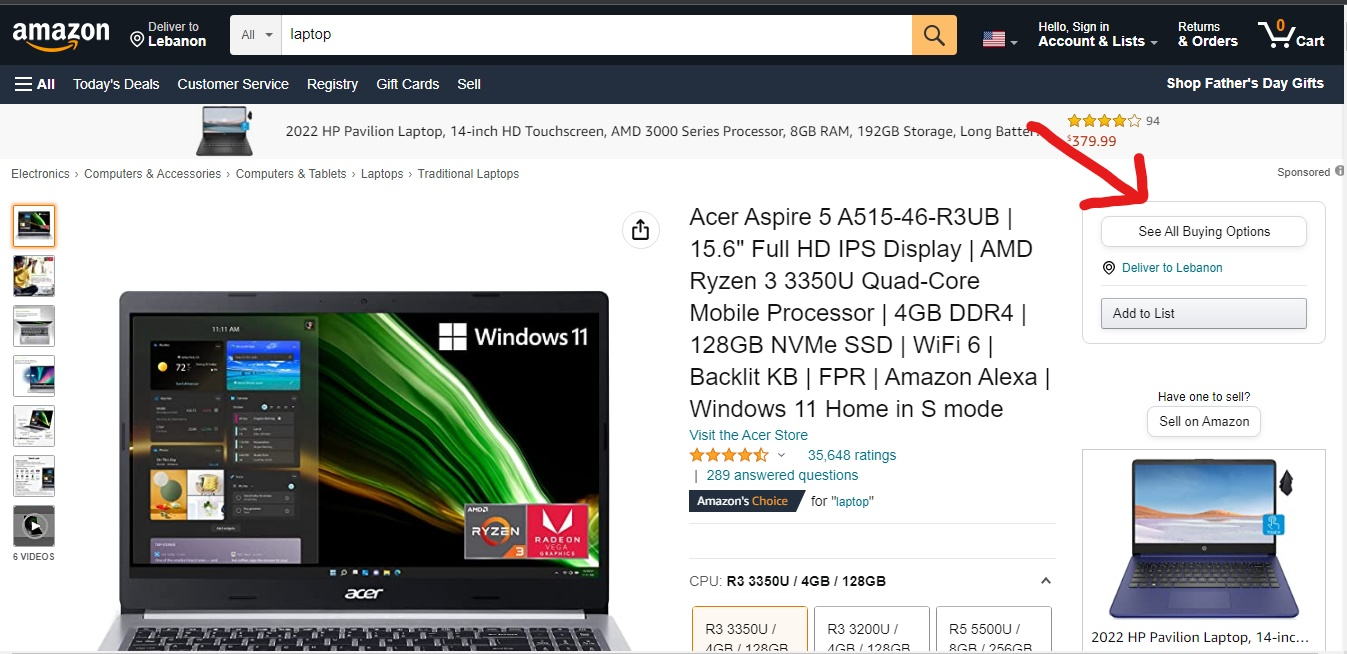

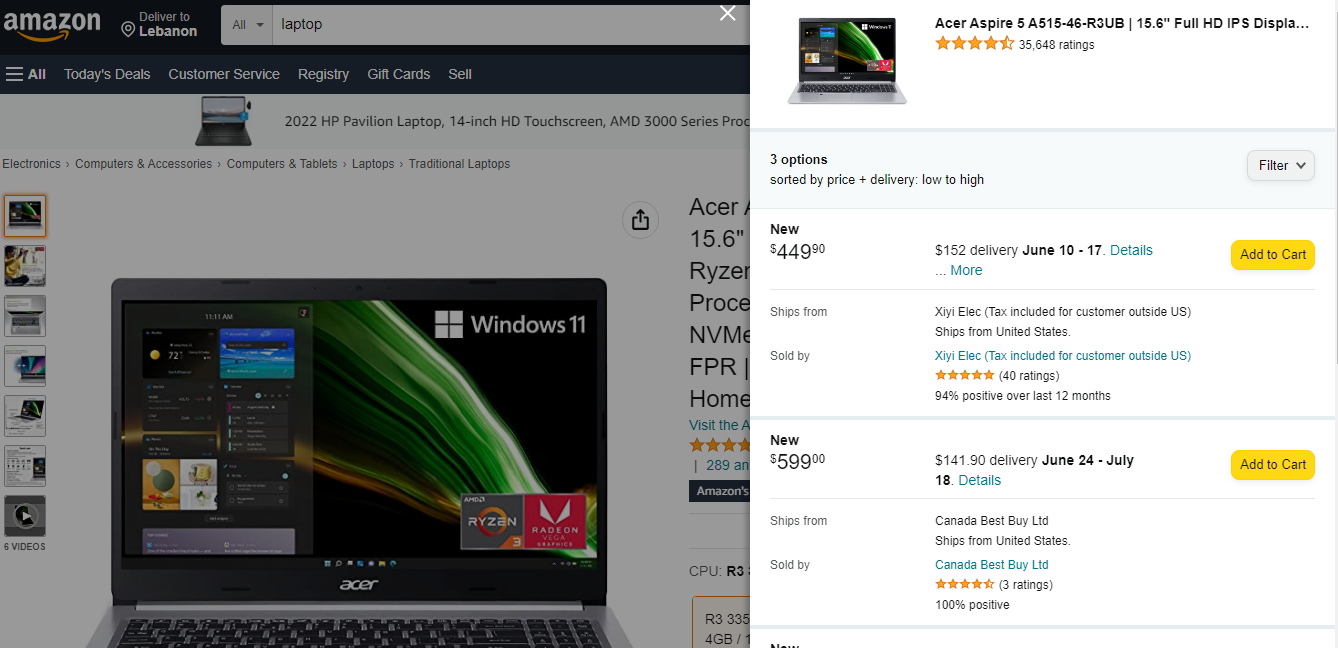

#### Solution:

So the solution here was to go to a website called [camelcamelcamel](https://camelcamelcamel.com/) which tracks product price history and displays the recent price.

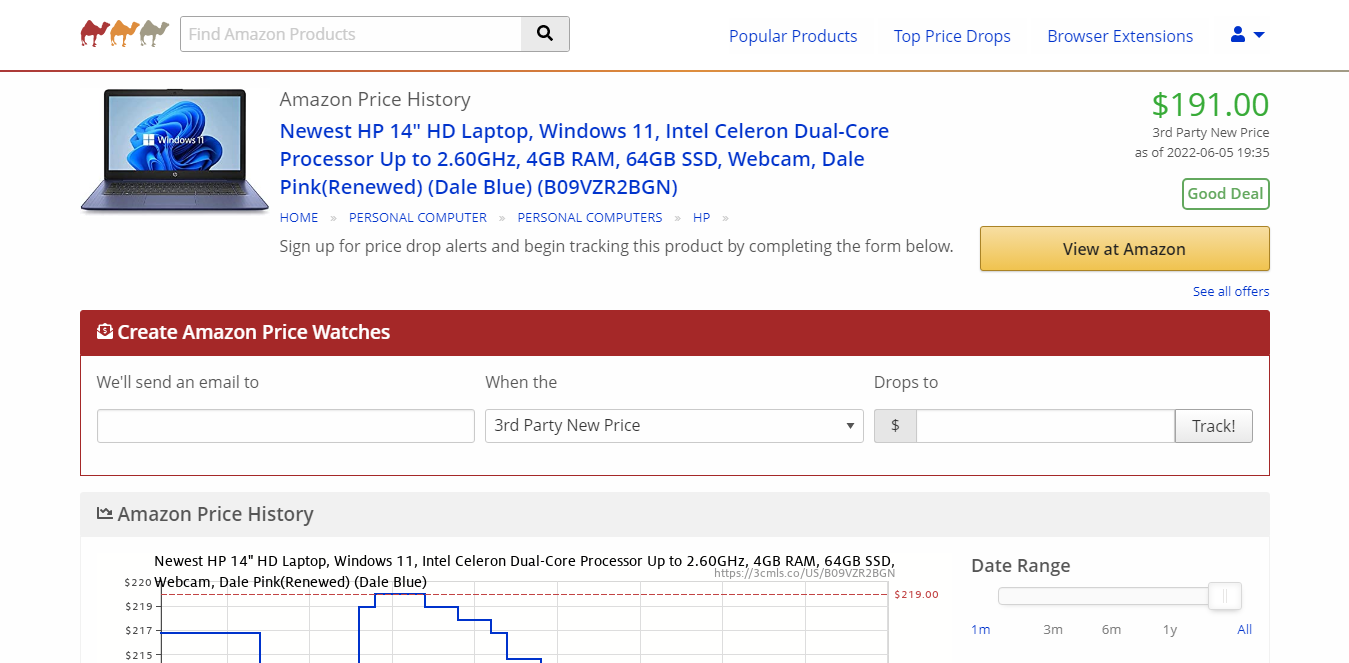

Python code: <br>
Here a library called Selenium is used to create a bot to open the page, then scrape the page source, because it was not possible to scrape camelcamelcamel in a regular way using beautifulsoup and requests.

In [ ]:
# Libraries

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import requests
from bs4 import BeautifulSoup
import pandas as pd
from zmq import NULL

# reading CSV file

filename = 'camel_links.csv'
data = pd.read_csv(filename)
links = data['camel'].tolist()


prices = []
urls = []


def scrap_camel(url):
    driver = webdriver.Chrome()
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    try:
        camel_price = soup.find(
            'span', class_='green').text
    except:
        camel_price = NULL

    driver.close()

    prices.append(camel_price)


for page in links:
    url = page
    urls.append(url)
    try:
        scrap_camel(url)
    except:
        camel_price = NULL
        prices.append(camel_price)

df = pd.DataFrame(urls, prices)
df.to_csv('prices.csv')


##### Result:

In [17]:
df = pd.read_csv('prices.csv')
df.head(10)

,Unnamed: 0,0
0,$366.84,https://camelcamelcamel.com/product/B09HVC79PC
1,$648.10,https://camelcamelcamel.com/product/B09BDFTX65
2,$499.00,https://camelcamelcamel.com/product/B09WX9TDM1
3,"$2,999.00",https://camelcamelcamel.com/product/B09LYK1WWG
4,$299.00,https://camelcamelcamel.com/product/B0949SGBF8
5,"$1,399.99",https://camelcamelcamel.com/product/B09SLLC612
6,$993.14,https://camelcamelcamel.com/product/B09BDGD2TZ
7,"$3,299.99",https://camelcamelcamel.com/product/B09RN27LHT
8,"$1,274.48",https://camelcamelcamel.com/product/B09127DDVT
9,"$1,159.00",https://camelcamelcamel.com/product/B09D8SGXB6


### Analysis

After combining all the data and doing some cleaning in excel, here is the final result:

In [18]:
df = pd.read_csv('Final.csv')
df.head(10)

,Link,Title,Price,Standing screen display size(Inches),Screen Resolution,Max Screen Resolution,Processor,RAM Type,RAM,Memory Speed,Hard Drive,Graphics Coprocessor,Chipset Brand,Card Description,Wireless Type,Graphics Card Ram Size,Number of USB 2.0 Ports,Number of USB 3.0 Ports,Average Battery Life (in hours)
0,https://www.amazon.com//2021-Dell-Inspiron-Lap...,2021 Dell Inspiron 15 Laptop:,$555.00,15.6,1920x1080,1920 x 1080 Pixels,core_i5,DDR4,8 GB,3.6 GHz,256 GB SSD,Intel UHD Graphics,Intel,Integrated,Bluetooth,NaN,NaN,NaN,NaN
1,https://www.amazon.com//2021-MSI-HD-Gaming-i5-...,2021 MSI - GF63035 |,$684.98,15.6,NaN,1920 x 1080 Pixels,core_i5,DDR4,8 GB,4.5 GHz,1 TB SSD,RTX 3050,NVIDIA,Dedicated,Bluetooth,NaN,NaN,NaN,6 Hours
2,https://www.amazon.com//2022-ASUS-Vivobook-15-...,"2022 ASUS Vivobook 15.6"" FHD","$1,099.00",15.6,NaN,1920x1080 Pixels,core_i7,DDR4,36 GB,2666 MHz,1 TB SSD,Intel Iris Plus,Intel,Integrated,801.11ac,NaN,NaN,4.0,6 Hours
3,https://www.amazon.com//2022-HP-Performance-Bu...,2022 HP High Performance Business,$899.00,15.6,1920x1080,1920 x 1080 Pixels,core_i5,DDR4,16 GB,2666 MHz,512 GB SSD,Intel Iris Xe Graphics,Intel,Integrated,802.11a/g/n/ac,NaN,NaN,3.0,6 Hours
4,https://www.amazon.com//2022-LENOVO-ThinkPad-Y...,2022 LENOVO ThinkPad X1 Yoga,"$1,498.00",14.0,1920x1080,1920 x 1080 Pixels,core_i5,LPDDR3,16 GB,1.6 GHz,1 TB ssd,Intel UHD Graphics,Intel,Integrated,802.11ax,NaN,NaN,3.0,NaN
5,https://www.amazon.com//Acer-3-60GHz-i5-1035G-...,"Acer Aspire 3 Laptop, 17.3''",$479.00,17.3,NaN,1600 x 900 Pixels,core_i5,DDR4,20 GB,3.6 GHz,1 TB SSD,UHD Graphics,Intel,Integrated,Bluetooth,NaN,2.0,1.0,NaN
6,https://www.amazon.com//Acer-A515-46-R3UB-Disp...,Acer Aspire 5 A515-46-R3UB |,$366.84,15.6,NaN,1920 x 1080,ryzen_3,DDR4,4 GB,3.5 GHz,128 GB SSD,NaN,AMD,Integrated,Bluetooth,NaN,1.0,3.0,10 Hours
7,https://www.amazon.com//Acer-A515-55-35SE-i3-1...,"Acer Aspire 5 A515-55-35SE, 15.6""",$369.00,15.6,NaN,1920x1080 Pixels,core_i3,DDR4,4 GB,3.4 GHz,128 GB SSD,Intel UHD Graphics,Intel,Integrated,Bluetooth,NaN,1.0,3.0,8 Hours
8,https://www.amazon.com//Acer-A515-56-53S3-i5-1...,Acer Aspire 5 A515-56-53S3 Laptop,$602.62,15.6,NaN,1920 x 1080,core_i5,DDR4,8 GB,NaN,256 GB SSD,NaN,Intel,Integrated,"Bluetooth, 802.11ax",NaN,1.0,3.0,NaN
9,https://www.amazon.com//Acer-A515-56-702V-i7-1...,Acer Aspire 5 A515-56-702V Laptop,$879.99,15.6,NaN,1920 x 1080,core_i7,DDR4,16 GB,2.8 GHz,512 GB SSD,NaN,Intel,Integrated,"Bluetooth, 802.11ax",NaN,1.0,3.0,NaN


### Click the link below to see the dashboard where you can select the best laptop for you

[https://public.tableau.com/views/BestLaptop/Dashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link](https://public.tableau.com/views/BestLaptop/Dashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)